<Figure size 1200x800 with 0 Axes>

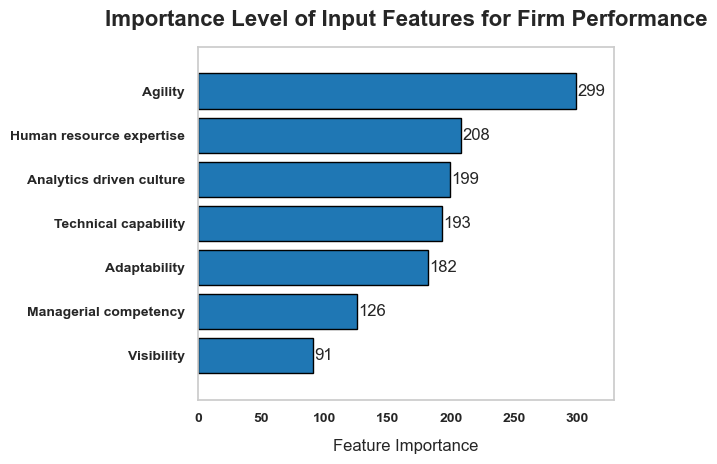

In [140]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
# Import data from Excel file from sheet name as latent variables
data = pd.read_excel('variables.xlsx', sheet_name='Latent variables')
# Remove the first column
data = data.iloc[:, 1:]
X = data[['Analytics driven culture', 'Human resource expertise', "Managerial competency", "Technical capability",
          'Visibility', 'Agility', "Adaptability"]]  # Replace with your subdimensions
y = data['Firm performance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from xgboost import XGBRegressor, plot_importance
import matplotlib.pyplot as plt
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5, 7],
#     'subsample': [0.6, 0.8, 1.0],
#     'colsample_bytree': [0.6, 0.8, 1.0]
# }

# # Initialize the GridSearch
# grid_search = GridSearchCV(
#     estimator=XGBRegressor(random_state=42),
#     param_grid=param_grid,
#     scoring='r2',
#     cv=3,
#     verbose=1,
#     n_jobs=-1
# )

# # Fit the GridSearch to the training data
# grid_search.fit(X_train, y_train)

# # Best parameters and model
# print("Best Parameters:", grid_search.best_params_)
# best_model = grid_search.best_estimator_

# Train the model
xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.01, max_depth=3, random_state=42)
xgb_model.fit(X_train, y_train)
# Make predictions
y_pred = xgb_model.predict(X_test)
# Improved Feature Importance Plot
import matplotlib.pyplot as plt
from xgboost import plot_importance

plt.figure(figsize=(12, 8))  # Larger figure size for better readability
# Remove the decimals from the feature importance values

# Customize the plot_importance function
plot_importance(
    xgb_model, 
    importance_type='weight',  # Show the number of times a feature appears in a tree
    xlabel='Feature Importance', 
    height=0.8, 
    grid=False,  # Disable grid lines
    max_num_features=10,  # Show top 10 features if applicable
    show_values=True, values_format= "{v:.0f}"  # Show the values on the bars
)

# Customize title and axis labels
plt.title("Importance Level of Input Features for Firm Performance", fontsize=16, weight='bold', pad=15)
plt.xlabel("Feature Importance", fontsize=12, labelpad=10)
# Remove y-axis label
plt.ylabel("")
# plt.ylabel("Features", fontsize=12, labelpad=10)

# Customize axis ticks
plt.xticks(fontsize=10, weight='bold', rotation=0)
plt.yticks(fontsize=10, weight='bold')

# Change color scheme of the bars
for bar in plt.gca().patches:
    bar.set_color('#1f77b4')  # Set to a specific color (blue)
    bar.set_edgecolor('black')  # Add a black edge to each bar

# Tight layout for better spacing
plt.tight_layout()

# Display the plot
# save the graph in jpg format with 300 dpi
plt.savefig('feature_importance.jpg', dpi=300)
